In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

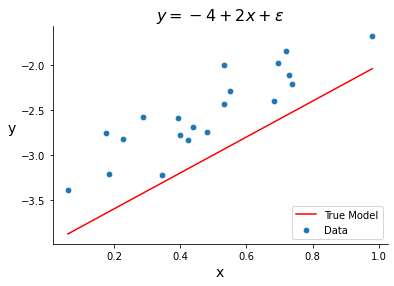

In [2]:
np.random.seed(123)
N = 20
beta0 = -4
beta1 = 2

x = np.random.rand(N)
e = np.random.rand(N)
y = beta0 + beta1*x + e
true_x = np.linspace(min(x), max(x), 100)
true_y = beta0 + beta1*true_x

fig, ax =  plt.subplots()
sns.scatterplot(x=x, y=y, s=40, label='Data')
sns.lineplot(x=true_x, y=true_y, color='red', label='True Model')
ax.set_xlabel('x', fontsize=14)
ax.set_title(fr"$y = {beta0} + ${beta1}$x + \epsilon$", fontsize=16)
ax.set_ylabel('y', fontsize=14, rotation=0, labelpad=10)
ax.legend(loc = 4)
sns.despine()

In [3]:
## Loss minimization

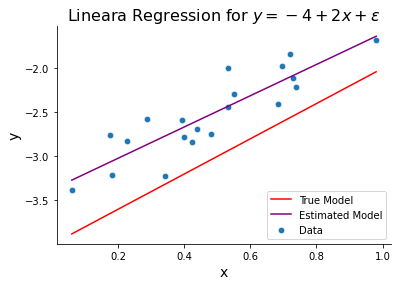

In [4]:
np.random.seed(123)
N = 20
beta0 = -4
beta1 = 2

x = np.random.rand(N)
e = np.random.rand(N)
y = beta0 + beta1*x + e
true_x = np.linspace(min(x), max(x), 100)
true_y = beta0 + beta1*true_x

# Estimate model
beta1_hat = sum((x - np.mean(x))*(y - np.mean(y)))/sum((x - np.mean(x))**2)
beta0_hat = np.mean(y) - beta1_hat*np.mean(x)
fit_y = beta0_hat + beta1_hat*true_x

# Plot
fig, ax = plt.subplots()
sns.scatterplot(x = x, y = y, s = 40, label='Data')
sns.lineplot(x = true_x, y = true_y, color = 'red', label='True Model')
sns.lineplot(x = true_x, y = fit_y, color = 'purple', label = 'Estimated Model')
ax.set_title(fr"Lineara Regression for $y = {beta0} + ${beta1}$x + \epsilon$", fontsize=16)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.legend(loc = 'lower right')
sns.despine()

# **Loss Minimization** 


$\text{True Function}: y_{n} = \beta_{0} + \beta_{1} + \epsilon_{n}$ \\
$\text{Estimate}: \bar{y_{n}} = \bar{\beta_{0}} + \bar{\beta_{1}}x_{n}$ \\
 \\

$\text{Our Residual Sum of Squares is the measure of how good our estimate is to the given data.}$ \\
$\mathrm{RSS = }$
$\mathcal{L}(\bar{\beta_{0}}, \bar{\beta_{1}}) = \frac{1}{2}\sum^{N}_{n=1}(y_{n} - \bar{y_{n}})^2$ \\

Expanding our $\mathit{RSS}:$ \\
$\mathcal{L}(\bar{\beta_{0}}, \bar{\beta_{1}}) = \frac{1}{2}\sum^{N}_{n=1}(y_{n} - (\bar{\beta_{0}} + \bar{\beta_{1}}))^2$ \\

Now, we'll differrentiate this wrt $\mathit{\bar{\beta_{0}}, {\bar{\beta_{1}}}}$, \\
$\frac{\partial{\mathcal{L}(\bar{\beta_{0}}, \bar{\beta_{1}})}}{\partial{\bar{\beta_{0}}}} =  - \sum_{n=1}^{N}(y_{n} - \bar{\beta_{0}} - \bar{\beta_{1}} \bar{x}) = -N(\bar{y} - \bar{\beta_{0}} - \bar{\beta_{1}}\bar{x})$ \\
Set this derivative equals 0, \\
$\beta_{0} = \bar{y} - \bar{\beta_{1}}\bar{x}\tag{1}$ \\
 \\

$\frac{\partial{\mathcal{L}(\bar{\beta_{0}}, \bar{\beta_{1}})}}{\partial{\bar{\beta_{1}}}} =  - \sum_{n=1}^{N}(y_{n} - \bar{\beta_{0}} - \bar{\beta_{1}} \bar{x})x_{n} $ \\
Setting this equal to 0 and substituting for $\mathit{\bar{\beta_{0}}}$, we get \\
$
\sum_{n=1}^{N}(y_{n} - (\bar{y} - \bar{\beta_{1}}\bar{x})x_{n}) = 0 \\
\bar{\beta_{1}}\sum_{n=1}^{N}(x_{n} - \bar{x})x_{n} = \sum_{n=1}^{N}(y_{n} - \bar{y})x_{n} => \bar{\beta_{1}} = \frac{\sum{x_{n}(y_{n} - \bar{y})}}{\sum{}x_{n}(x_{n} - \bar{x})}
$ \\

$\text{Now, we'll use a small algebric trick}$ 
$\sum{c(z_{i} - \bar{z})} = 0$ 
$\text{for any constant c. So, we'll subtract}$ $\sum{\bar{x}(y_{n} - \bar{y})}$ $\text{from denominator and numerator without changing our slope estimate.}$ \\

$
\bar{\beta_{1}} = \frac{\sum{(x_{n} - \bar{x})(y_{n} - \bar{y})}}{\sum(x_{n} - \bar{y})^2} \tag{2}
$








**Multiple Regression**




$y_{n} = \beta_{0} + \beta_{1}x_{n1} + \beta_{2}x_{n2}+ ... +\beta_{D}x_{nD} + \epsilon_{n}$ \\

$\text{Using the vector notation, this can be compactly written as}$ \\
$y_{n} = {\boldsymbol\beta}^T\mathbf{x}_{n} + \epsilon_{n}$ \\
$\mathcal{L}(\bar{\boldsymbol\beta}) = \frac{1}{2}\sum{(y_{n} - \hat{\boldsymbol\beta^T}\mathbf{x}_{n}})^2 = \frac{1}{2}\sum(y_{n} - \hat{y}_{n})^2$ \\
$\mathbf{y} = 
\begin{bmatrix}
y_{1}\\
y_{2}\\
...
\\
y_{N}
\end{bmatrix}
\in\mathbb{R}^N, \mathbf{X} = 
\begin{bmatrix}
\mathbf{x}^T_{1}\\
\mathbf{x}^T_{2}\\
...
\\
\mathbf{x}^T_{N}\\
\end{bmatrix}
\in\mathbb{R}^{N\times(D+1)}\\
$ [(D+1) because, we're stacking the $\beta_{0} also]$
 \\
Which gives, $\hat{\mathbf{y}} = \mathbf{X}\hat{\boldsymbol\beta} \in \mathbb{R}^N$ \\
Rewriting the loss function with these notations, \\
$\mathcal{L}(\hat{\boldsymbol\beta}) = \frac{1}{2}\sum{(\mathbf{y} - \mathbf{}X\hat{\boldsymbol\beta})^T(\mathbf{y} - \mathbf{X}\hat{\boldsymbol\beta})}$



**Parameter Estimation** 

$
\text{We'll use the below derivation: } \\
\text{For a symmetric matrix}\space \mathbf{W}, \\
\frac{\partial{(\mathbf{q} - \mathbf{As})^T\mathbf{W}(\mathbf{q} - \mathbf{As})}}{\partial{\mathbf{s}}} =  -2\mathbf{A}^T\mathbf{W}(\mathbf{q} - \mathbf{As})
$ \\
Applying the above result, we get the derivative of the RSS with respect to $\hat{\boldsymbol{\beta}}$ (note that the identity matrix takes the place of $\mathbf{W}$): \\
$
\mathcal{L}(\hat{\boldsymbol{\beta}}) = \frac{1}{2}(\mathbf{y} - \mathbf{X}\hat{\boldsymbol{\beta}})^T(\mathbf{y} - \mathbf{X}\hat{\boldsymbol{\beta}}) \\
\frac{\partial{\mathcal{L}(\hat{\boldsymbol{\beta}})}}{\partial{\hat{\boldsymbol{\beta}}}} = -\mathbf{X}^T(\mathbf{y} - \mathbf{X}\hat{\boldsymbol{\beta}}) \\
\text{We get our parameters by setting this equal to 0, } \\
(\mathbf{X}^T\mathbf{X})\hat{\boldsymbol{\beta}} = \mathbf{X}^T\mathbf{y} \\
\hat{\boldsymbol{\beta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y} 
$ \\
 \\

**Another Solution** \\
$\mathcal{L}(\hat{\boldsymbol{\beta}}) = \frac{1}{2}(\mathbf{y} - \mathbf{X}\hat{\boldsymbol{\beta}})^T(\mathbf{y} - \mathbf{X}\hat{\boldsymbol{\beta}})$ \\
$\mathcal{L}(\hat{\boldsymbol{\beta}}) = \frac{1}{2}((\mathbf{y}^T\mathbf{y}) - \mathbf{y}^T\mathbf{X}\hat{\boldsymbol{\beta}} - (\mathbf{X}\hat{\boldsymbol{\beta}})^T\mathbf{y} + (\mathbf{X}\hat{\boldsymbol{\beta}})^T(\mathbf{X}\hat{\boldsymbol{\beta}})) \\
 \mathcal{L}(\hat{\boldsymbol{\beta}}) =  \frac{1}{2}(\hat{\boldsymbol{\beta}^T}\mathbf{X}^T\mathbf{X}\hat{\boldsymbol{\beta}} - 2\hat{\boldsymbol{\beta}^T}\mathbf{X}^T\mathbf{y} + \mathbf{y}^T\mathbf{y})$ \\
$\text{Using the following result from calculus,}$ \\
$
\nabla_{\mathbf{x}}(\mathbf{a}^T\mathbf{x}) = \mathbf{a} \\
\nabla_{\mathbf{x}}(\mathbf{x}^T\mathbf{A}\mathbf{x}) = (\mathbf{A} + \mathbf{A}^T)\mathbf{x}
$ \\
$
\nabla{\mathcal{L}(\hat{\boldsymbol{\beta}})} = \nabla_{\hat{\boldsymbol{\beta}}}(\frac{1}{2}(\hat{\boldsymbol{\beta}^T}\mathbf{X}^T\mathbf{X}\hat{\boldsymbol{\beta}} - 2\hat{\boldsymbol{\beta}^T}\mathbf{X}^T\mathbf{y} + \mathbf{y}^T\mathbf{y})) = \mathbf{X}^T\mathbf{X}\hat{\boldsymbol{\beta}} - \mathbf{X}^T\mathbf{y}
$ \\
$\mathbf{X}^T\mathbf{X}\hat{\boldsymbol\beta} = \mathbf{X}^T\mathbf{y} => \hat{\boldsymbol\beta} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$




In [5]:
class LinearRegression:
  def fit(self, X, y, intercept = False):
    if intercept == False: # Add intercept if not already included
      ones = np.ones(len(X)).reshape(len(X), 1) # column of ones
      X = np.concatenate((ones, X), axis = 1)
    self.X = np.array(X)
    self.y = np.array(y)
    self.N, self.D = self.X.shape

    #Estimation
    XtX = np.dot(self.X.T, self.X) # (X^T*X)
    XtX_inverse = np.linalg.inv(XtX) # (X^T*X)^-1
    Xty = np.dot(self.X.T, self.y) # (X^T*y)
    self.beta_hats = np.dot(XtX_inverse, Xty)

    self.y_hat = np.dot(self.X, self.beta_hats)

    self.L = 0.5*np.sum((self.y - self.y_hat)**2)

  def predict(self, X_test, intercept = False):
    if intercept == False: # Add intercept if not already included
        ones = np.ones(len(X_test)).reshape(len(X_test), 1) # column of ones
        X_test = np.concatenate((ones, X_test), axis = 1)
    self.y_test_hat = np.dot(X_test, self.beta_hats)



In [6]:
from sklearn import datasets
boston = datasets.load_boston()
X = boston['data']
y = boston['target']

In [7]:
model = LinearRegression()
model.fit(X, y, intercept = False)

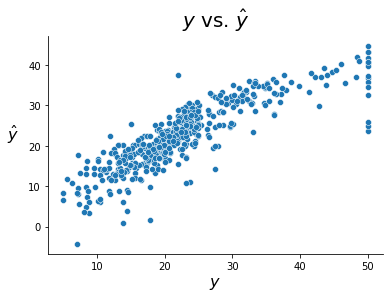

In [8]:
fig, ax = plt.subplots()
sns.scatterplot(x = model.y, y = model.y_hat)
ax.set_xlabel(r'$y$', size =16)
ax.set_ylabel(r'$\hat{y}$', rotation = 0, size = 16, labelpad = 15)
ax.set_title(r'$y$ vs. $\hat{y}$', size = 20, pad = 10)
sns.despine()

<AxesSubplot:>

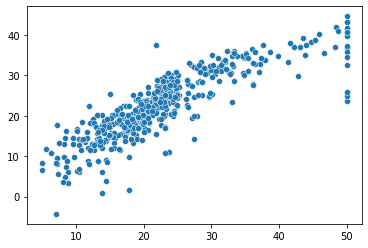

In [9]:
model.predict(X)
sns.scatterplot(x = y, y = model.y_test_hat)

# **Maximum likelihood Estimation**

Using the maximum likelihood approach, we set up the regression model probabilistically. Since we are
treating the target as a random variable, we will capitalize it. As before, we assume: \\
$\mathbf{Y}_n = \beta_{0} + \beta_{1}x_n + \epsilon_{n}$ \\
Now, we assume the distribution of $\epsilon_{n}$. typically, we assume $\epsilon_n$ are independently Normally distributed with mean 0 and unknown variance. \\
$\epsilon_n {\sim} \mathcal{N}(0, \sigma^2)$ \\
Now, \\
$\mathbf{Y}_n \sim \mathcal{N}(\beta_0 + \beta_1x_n, \sigma^2)$ \\
**Parameter Estimation** \\
Now, we'd find a distribution that maximes tha likelihood of all $\mathbf{Y}$'s. The joint likelihood and log-likelihood across the observations are as follows: \\
$\mathbf{L}(\beta_0, \beta_1;\mathbf{Y}_1, \mathbf{Y}_2,...,\mathbf{Y}_N) = \Pi_{n=1}^{N}\mathbf{L}(\beta_0, \beta_1; \mathbf{Y}_n)$ \\
$\mathbf{L}(\beta_0, \beta_1;\mathbf{Y}_1, \mathbf{Y}_2,...,\mathbf{Y}_N) = \Pi\frac{1}{\sqrt{2\pi\sigma}}\exp{(-\frac{(\mathbf{Y_n} - (\beta_0+\beta_1 x_n))^2}{2\sigma^2})} \\ \space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space \propto \Sigma\frac{1}{\sqrt{2\pi\sigma}}\exp{(-\frac{(\mathbf{Y_n} - (\beta_0+\beta_1 x_n))^2}{2\sigma^2})}$ \\
$\log{\mathbf{L}(\beta_0, \beta_1;\mathbf{Y}_1, \mathbf{Y}_2,...,\mathbf{Y}_N)} = -\frac{1}{2\sigma^2}\Sigma(\mathbf{Y}_n - (\beta_0+\beta_1x_n))^2$ \\

Our $\beta_0, \beta_1$ estimates are the values that maximize the log-liklihood given above. Notice that this is equivalent to finding the $\hat{\beta_0}, \hat{\beta_1}$ that minimizez the RSS, \\
$RSS = \frac{1}{2}\Sigma(y_n - ({\hat{\beta_0}}+\hat{\beta_1}x_n))^2$

 

In [12]:
# Scikit-Learn
from sklearn.linear_model import LinearRegression
sklearn_model = LinearRegression()
sklearn_model.fit(X, y)

LinearRegression()

/home/luna/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


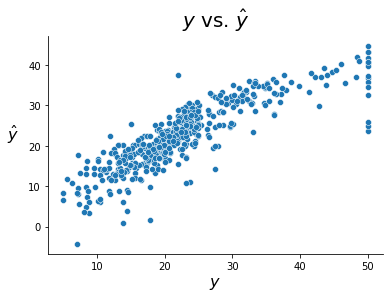

In [13]:
sklearn_predictions = sklearn_model.predict(X)
fig, ax = plt.subplots()
sns.scatterplot(y, sklearn_predictions)
ax.set_xlabel(r'$y$', size = 16)
ax.set_ylabel(r'$\hat{y}$', rotation = 0, size = 16, labelpad = 15)
ax.set_title(r'$y$ vs. $\hat{y}$', size = 20, pad = 10)
sns.despine()

In [14]:
predictors = boston.feature_names
beta_hats = sklearn_model.coef_
print('\n'.join([f'{predictors[i]}: {round(beta_hats[i], 3)}' for i in range(3)]))

CRIM: -0.108
ZN: 0.046
INDUS: 0.021
